cut time :  0.053887367248535156 s

total words count :  4527


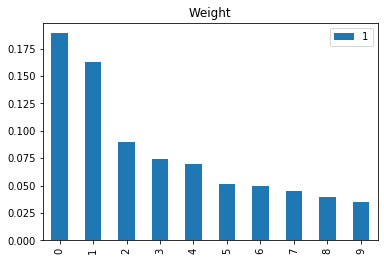

In [86]:
import jieba
import jieba.analyse
import pandas as pd
import matplotlib.pylab as plt
import time


doc = open('./hw1-dataset-ez.txt', 'r', encoding = "utf-8").read()


tags_list = jieba.analyse.extract_tags(doc, topK = 10, withWeight = True, allowPOS=())

tags_list.sort(key=lambda x:x[1], reverse=True)
#print(tags_list)


# start time 
cut_st = time.time()

words_list = jieba.lcut(doc)

# end time
cut_et = time.time()
print("cut time : ", cut_et - cut_st, "s")

# number of each word
word_count = {}
for word in words_list:
    word_count[word] = word_count.get(word, 0) + 1

# delete the particular character
del_keys = ['\t', '\n', '。', '!','！', '?', ',', '？', '\u3000', ' ', '，', '\\', '/']
for del_key in del_keys:
    del word_count[del_key]
    
#print("\nwords count : ", word_count)


total_count = sum(word_count.values())
print("\ntotal words count : ", total_count)

# frequency of each word
word_freq = word_count
for word in word_freq:
    word_freq[word] /= total_count
    
#print("\nwords freq : ", word_freq)

items = list(word_freq.items())
items.sort(key=lambda x:x[1], reverse=True) 
#print(items)


df_weight = pd.DataFrame(tags_list)
df_weight.head(10).plot(kind = 'bar', title = "Weight")


df_freq = pd.DataFrame(items)
df_freq.head(10).plot(kind = 'bar', title = "Frequency")